In [2]:
import pandas as pd
import numpy as np

In [3]:
companies = pd.read_csv('companies.txt', sep='\t', encoding = 'ISO-8859-1')
rounds2=pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
companies.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
companies['permalink'] = pd.Series(map(lambda x: x.lower() , companies['permalink']))
rounds2['company_permalink']= pd.Series(map(lambda x: x.lower(), rounds2['company_permalink']))

In [6]:
companies['permalink'].nunique()

66368

In [7]:
rounds2['company_permalink'].nunique()


66370

In [8]:
rounds2= rounds2.rename(columns = {"company_permalink": "permalink"})


In [9]:
master_frame=pd.merge(rounds2,companies,on='permalink',how='inner')
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [10]:
len(master_frame.index)


114942

In [11]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)


permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [12]:
master_frame = master_frame.drop('funding_round_permalink', axis=1)
master_frame = master_frame.drop('funded_at', axis=1)
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)

In [13]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)


permalink              0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.96
status                 0.00
country_code           7.54
dtype: float64

In [14]:
len(master_frame.index)

114942

In [15]:
master_frame= master_frame[pd.notnull(master_frame['raised_amount_usd'])]

In [16]:
master_frame= master_frame[pd.notnull(master_frame['country_code'])]
master_frame= master_frame[pd.notnull(master_frame['category_list'])]

In [17]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)


permalink             0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
status                0.0
country_code          0.0
dtype: float64

In [18]:
len(master_frame.index)

88529

In [19]:
funding_round_type_group=master_frame.groupby('funding_round_type')

In [20]:
type_funding=funding_round_type_group['raised_amount_usd'].mean().sort_values(ascending=False).astype('int')
type_funding

funding_round_type
post_ipo_debt            169451789
secondary_market          84438532
private_equity            73938486
post_ipo_equity           66077058
debt_financing            17167653
undisclosed               15891661
venture                   11724222
grant                      4512698
product_crowdfunding       1353226
convertible_note           1337186
angel                       971573
seed                        747793
equity_crowdfunding         509897
non_equity_assistance       480753
Name: raised_amount_usd, dtype: int64

In [21]:
len(master_frame.index)

88529

In [22]:
master_for_plot=master_frame.loc[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

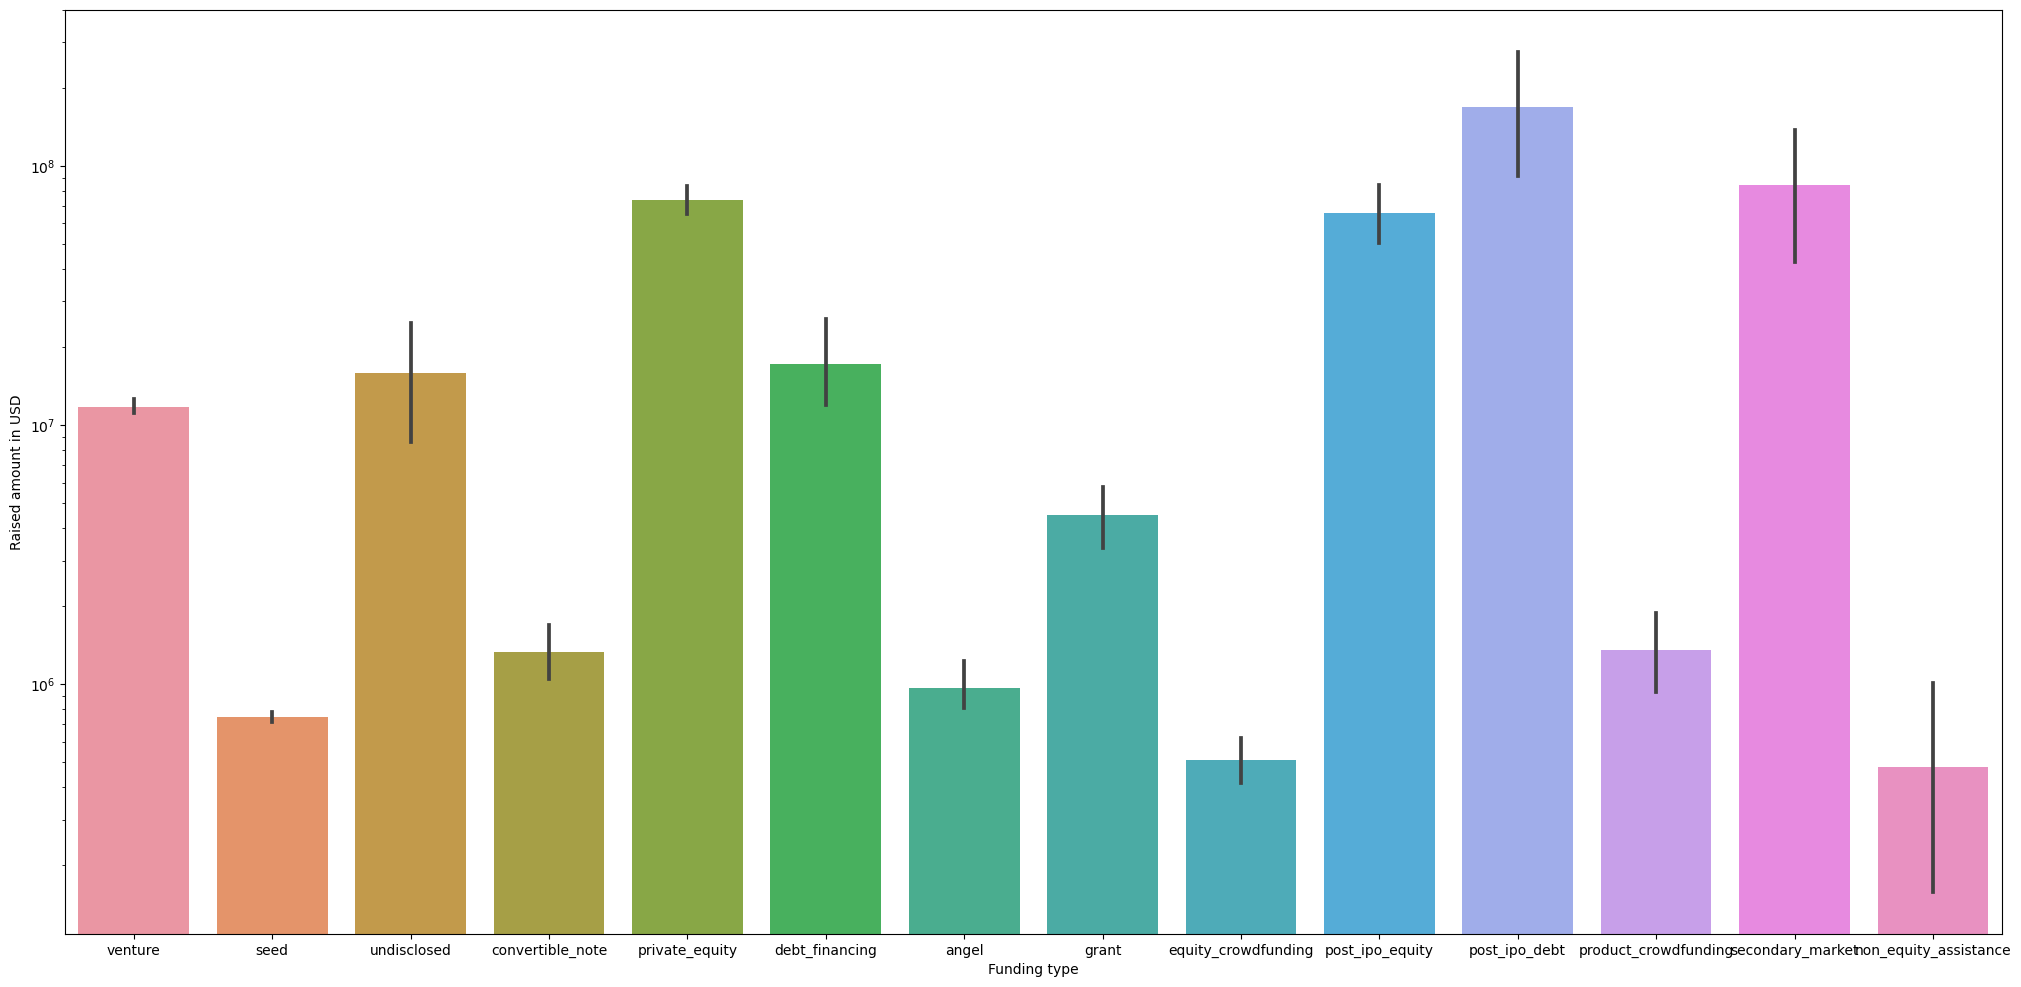

In [24]:
#Showing funding type with investment to identify 5-15M type
plt.rc('font', size=MEDIUM_SIZE)
plt.figure(num=None,figsize=(25,12))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame,estimator=np.mean)
plt.xlabel('Funding type')
plt.ylabel('Raised amount in USD')
plt.yscale('log')
plt.show()

In [25]:
#Filtering venture type records
master_frame = master_frame.loc[master_frame['funding_round_type']=='venture']
master_frame.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,operating,USA
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,operating,USA


In [26]:
len(master_frame)

47809

In [27]:
master_frame['country_code'].head()


0     IND
4     CHN
8     CAN
10    USA
11    USA
Name: country_code, dtype: object

In [28]:
master_frame['primary_sector']=master_frame['category_list'].apply(lambda v: v.split('|')[0].lower())
master_frame['primary_sector'].head()

/var/folders/sx/rkl9850d4kgcj_7lqp3jsgs00000gn/T/ipykernel_14012/3917309498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame['primary_sector']=master_frame['category_list'].apply(lambda v: v.split('|')[0].lower())


0             media
4       curated web
8     biotechnology
10        analytics
11        analytics
Name: primary_sector, dtype: object

In [37]:
top9=master_frame
top9_grouped=top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).astype('int64')
top9_grouped.head()

country_code
USA    420068029342
CHN     39338918773
GBR     20072813004
IND     14261508718
CAN      9482217668
Name: raised_amount_usd, dtype: int64

In [30]:
top9_grouped.index


Index(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN', 'SWE',
       'NLD', 'CHE', 'SGP', 'ESP', 'BRA', 'IRL', 'RUS', 'AUS', 'DNK', 'FIN',
       'BEL', 'NOR', 'KOR', 'MYS', 'HKG', 'TWN', 'AUT', 'TUR', 'ITA', 'NZL',
       'LUX', 'ARE', 'ARG', 'BMU', 'IDN', 'EGY', 'ZAF', 'MEX', 'NGA', 'CZE',
       'PRT', 'POL', 'PHL', 'THA', 'COL', 'EST', 'ISL', 'LTU', 'PAK', 'CYP',
       'CYM', 'TAN', 'KEN', 'VNM', 'GIB', 'HUN', 'GHA', 'CHL', 'MAF', 'JOR',
       'ARM', 'LVA', 'URY', 'ROM', 'UKR', 'MLT', 'KNA', 'KWT', 'LIE', 'MNE',
       'SVN', 'BGR', 'KAZ', 'GRC', 'BAH', 'TTO', 'SVK', 'BGD', 'LBN', 'GGY',
       'TUN', 'SEN', 'HRV', 'UGA', 'PER', 'BWA', 'PAN', 'LAO', 'MAR', 'MUS',
       'PRI', 'ECU', 'MCO', 'SAU', 'CMR', 'GTM', 'MMR'],
      dtype='object', name='country_code')

In [31]:
eng_country_codes=['AUS','NZL','GBR','USA','ATG','BHS','BRB','BLZ','BWA','BDI','CMR','CAN','COK','DMA','SWZ','FJI','GMB','GHA','GRD','GUY','IND','IRL','JAM','KEN','KIR','LSO','LBR','MWI','MLT','MHL','MUS','FSM','NAM','NRU','NGA','NIU','PAK','PLW','PNG','PHL','RWA','KNA','LCA','VCT','WSM','SYC','SLE','SGP','SLB','ZAF','SSD','SDN','TZA','TON','TTO','TUV','UGA','VUT','ZMB','ZWE']
top9_grouped.loc[top9_grouped.index.isin(eng_country_codes)]

country_code
USA    420068029342
GBR     20072813004
IND     14261508718
CAN      9482217668
SGP      2793917856
IRL      1669285543
AUS      1319028698
NZL       448316383
ZAF       233713106
NGA       183440000
PHL       114499742
PAK        83125000
KEN        53940000
GHA        31200000
MLT        17728300
KNA        15000000
TTO         8500000
UGA         2500000
BWA         2250000
MUS         1500000
CMR          359561
Name: raised_amount_usd, dtype: int64

In [32]:
top9.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,media
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN,curated web
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,operating,USA,analytics
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,operating,USA,analytics


In [33]:
master_frame['category_list'].head(10)


0                                Media
4                          Curated Web
8                        Biotechnology
10                           Analytics
11                           Analytics
12                           Analytics
22    Apps|Cable|Distribution|Software
28                           Education
34                         Curated Web
38                         Curated Web
Name: category_list, dtype: object

In [34]:
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [35]:
len(mapping.index)

688